# **A FAZER**

- MELHORAR TODOS OS CAPITULOS
- INCLUIR MAIS REPORTS
- METER AS COISAS NO GIT
- FAZER UMA LEITURA DOS DADOS APRESENTADOS PELOS GRAFICOS

# Projeto Final - Análise Exploratória de Dados
## Dataset: TMDB 1M Movies Dataset

**Autor:** *Lucas Machadinho Martins*  
**Email do Autor:** *a79294@ualg.pt*  
**Curso:** *ANÁLISE DE DADOS E VISUALIZAÇÃO DA INFORMAÇÃO*  

---

### Objetivo do Projeto
O objetivo deste trabalho é realizar uma **análise exploratória de dados (EDA)** sobre um dataset, cujo escolhido dataset foi "Full TMDB Movies Dataset 2024 (1M Movies)", proveniente do website Kaggle, de filmes da **TMDB (The Movie Database)**, contendo cerca de **1 milhão de registos**.  

Este trabalho irá cobrir diversos aspestos, dos quais se destacam:

- Limpeza e preparação dos dados  
- Transformações relevantes  
- Análises uni e multivariadas  
- Visualizações gráficas  
- Estudo com séries temporais 
- Construção de um **dashboard interativo** com a biblioteca `panel`
---



## 2. Importação de bibliotecas e Código de Ajuda

In [1]:
from helper_functions import *
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import *
import numpy as np
from collections import Counter
import ast 

As bibliotecas e outro código útil está dentro do ficheiro python "helper_functions.py". Estas serão uteis para a correta execução dos códigos seguintes, sendo que têm a seguinte utilidade:
- Pandas:  fornece estruturas de dados rápidas, flexíveis e expressivas, projetadas para tornar o trabalho com dados relacionais fácil e intuitivo. Permite instanciar objetos de leitura e apresentação dos dados de um dataset, incluindo manipular os mesmos.
- Kaggle:  API offical do Kaggle. Utilizado neste trabalho para descarregar o Dataset automaticamente, se o mesmo não estiver presente no diretorio do trabalho
- Requests: Permite realizar requests HTTP de forma bastante intuitiva. Será necessário para interação com API's externas, como por exemplo, OMDB API (Open Movie Database)

## 3. Variáveis Globais

In [2]:
AMOUNT_RECORDS = 300

FILE_PATH = 'TMDB_movie_dataset_v11.csv'
DATASET_NAME = 'asaniczka/tmdb-movies-dataset-2023-930k-movies'

Estas variáveis são importantes para a incialização do projeto:
- AMOUNT_RECORDS -> Esta variável é o que define a quantidade de registos a serem lidos do Dataset. Devido à sua dimensão, 500MB (+- 1 milhão de registos), operações com a totalidade dos registos demoram bastante tempo. **Se prentender fazer a extração total do dataset, o número total de registos é 1314285. Não é recomendado, dado que irá demorar imenso tempo a carregar a informação e alguns gráficos poderão perder a sua integridade visual.**
- FILE_PATH -> Determina o diretório do Dataset, como também o nome do ficheiro a ser utilizado
- DATASET_NAME -> Utilizado em conjunto com a variável "FILE_PATH", determina o sufixo do URL do dataset no website do Kagle 

## 4. Código principal

In [3]:
#download_file_if_not_exists(FILE_PATH, DATASET_NAME)

O método acima verifica que se o ficheiro localizado na variável "FILE_PATH" já existe; se existe, não faz nada - caso contrário, é feito um request ao Dataset do Kagle, localizando-o através da variável "DATASET_NAME"

In [4]:
df = load_dataset_with_directors(FILE_PATH, limit= AMOUNT_RECORDS) #df = load_dataset_with_directors(FILE_PATH, limit= AMOUNT_RECORDS)

In [5]:
pd.set_option('display.max_columns', None)

df.head(AMOUNT_RECORDS)

,id,title,Director,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,Christopher Nolan,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,160000000,https://www.warnerbros.com/movies/inception,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,Christopher Nolan,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,165000000,http://www.interstellarmovie.net/,tt0816692,en,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,Christopher Nolan,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,185000000,https://www.warnerbros.com/movies/dark-knight/,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,James Cameron,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,237000000,https://www.avatar.com/movies/avatar,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,Joss Whedon,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,220000000,https://www.marvel.com/movies/the-avengers,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,495764,Birds of Prey (and the Fantabulous Emancipatio...,Cathy Yan,7.000,9654,Released,2020-02-05,205372791,108,False,/uozb2VeD87YmhoUP1RrGWfzuCrr.jpg,75000000,http://www.birdsofpreymovie.net,tt7713068,en,Birds of Prey (and the Fantabulous Emancipatio...,"Harley Quinn joins forces with a singer, an as...",49.330,/h4VB6m0RwcicVEZvzftYZyKXs6K.jpg,Mind Over Mayhem,"Action, Crime","Warner Bros. Pictures, DC Films, LuckyChap Ent...",United States of America,English,"police, pickpocket, chase, joker, psychopath, ..."
296,64688,21 Jump Street,"Phil Lord, Christopher Miller",6.878,9650,Released,2012-03-14,201585328,109,False,/rXrpYOveFl76ivMmyb2612T7Q8w.jpg,42000000,http://www.21jumpstreet-movie.com/,tt1232829,en,21 Jump Street,"In high school, Schmidt was a dork and Jenko w...",31.405,/8v3Sqv9UcIUC4ebmpKWROqPBINZ.jpg,The only thing getting blown tonight is their ...,"Action, Comedy, Crime","Columbia Pictures, Relativity Media, Original ...",United States of America,English,"drug dealer, high school, investigation, nerd,.

## Limpeza e Preparação dos Dados

Nesta etapa serão realizadas as seguintes tarefas:
- Verificação e tratamento de valores em falta
- Remoção de duplicados
- Conversão de tipos de dados
- Ajuste de colunas (nomes, formatos)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    300 non-null    int64  
 1   title                 300 non-null    object 
 2   Director              300 non-null    object 
 3   vote_average          300 non-null    float64
 4   vote_count            300 non-null    int64  
 5   status                300 non-null    object 
 6   release_date          300 non-null    object 
 7   revenue               300 non-null    int64  
 8   runtime               300 non-null    int64  
 9   adult                 300 non-null    bool   
 10  backdrop_path         300 non-null    object 
 11  budget                300 non-null    int64  
 12  homepage              253 non-null    object 
 13  imdb_id               300 non-null    object 
 14  original_language     300 non-null    object 
 15  original_title        3

In [7]:
df.isnull().sum()

id                       0
title                    0
Director                 0
vote_average             0
vote_count               0
status                   0
release_date             0
revenue                  0
runtime                  0
adult                    0
backdrop_path            0
budget                   0
homepage                47
imdb_id                  0
original_language        0
original_title           0
overview                 0
popularity               0
poster_path              0
tagline                  6
genres                   0
production_companies     0
production_countries     0
spoken_languages         0
keywords                 0
dtype: int64

In [8]:
df = df.drop_duplicates()

## Análise Estatística e Transformação dos Dados

Neste capítulo são analisadas relações entre variáveis através de:
- Correlações
- Gráficos de dispersão
- Tabelas dinâmicas (pivot tables)
- Cruzamentos entre variáveis (crosstabs)

Neste capitulo também são aplicadas transformações necessárias para a análise, tais como:
- Criação de novas variáveis (ex.: lucro = receita - orçamento)
- Extração de ano a partir da data
- Categorização de géneros ou países


### Cálculo de lucro

In [9]:
df['revenue_num'] = df['revenue'].replace(r'[\.\$\s]', '', regex=True).astype(float)
df['budget_num']  = df['budget'].replace(r'[\.\$\s]', '', regex=True).astype(float)

df['revenue_num'] = df['revenue_num'].fillna(0)
df['budget_num']  = df['budget_num'].fillna(0)

df['profit_num'] = df['revenue_num'] - df['budget_num']

df['revenue'] = df['revenue_num'].apply(format_currency)
df['budget']  = df['budget_num'].apply(format_currency)
df['profit']  = df['profit_num'].apply(format_currency)

df[['title', 'budget', 'revenue', 'profit', 'release_date']]

,title,budget,revenue,profit,release_date
0,Inception,160.000.000 $,825.532.764 $,665.532.764 $,2010-07-15
1,Interstellar,165.000.000 $,701.729.206 $,536.729.206 $,2014-11-05
2,The Dark Knight,185.000.000 $,1.004.558.444 $,819.558.444 $,2008-07-16
3,Avatar,237.000.000 $,2.923.706.026 $,2.686.706.026 $,2009-12-15
4,The Avengers,220.000.000 $,1.518.815.515 $,1.298.815.515 $,2012-04-25
...,...,...,...,...,...
295,Birds of Prey (and the Fantabulous Emancipatio...,75.000.000 $,205.372.791 $,130.372.791 $,2020-02-05
296,21 Jump Street,42.000.000 $,201.585.328 $,159.585.328 $,2012-03-14
297,One Flew Over the Cuckoo's Nest,3.000.000 $,108.981.275 $,105.981.275 $,1975-11-19
298,Looper,30.000.000 $,47.042.000 $,17.042.000 $,2012-09-26


In [10]:
df = df.drop(columns=['revenue_num', 'budget_num', 'profit_num'])

O lucro é o valor monetário que as empresas envolvidas no desenvolvimento do filme realmente "levam para casa". 
É calculado subtraindo o orçamento da receita de um dado filme, e permite-nos ter uma noção mais realista do quão benéfico um dado filme foi,
num ponto de vista financeiro

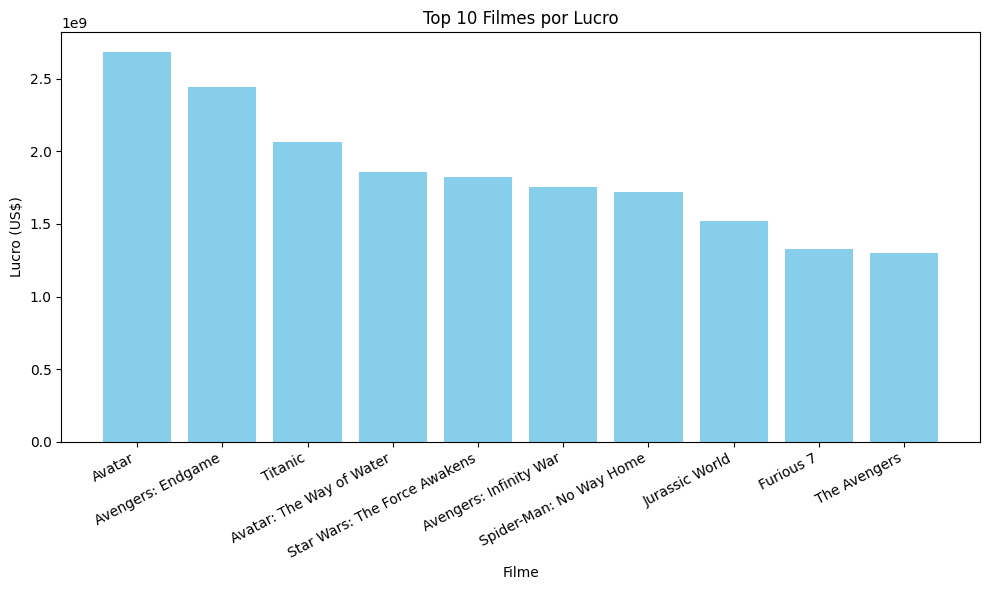

In [11]:
df['profit'] = df['profit'].astype(str) \
                              .str.replace('.', '', regex=False) \
                              .str.replace('$', '', regex=False)

df['profit'] = pd.to_numeric(df['profit'], errors='coerce')

df_sorted = df.sort_values(by='profit', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(df_sorted['title'], df_sorted['profit'], color='skyblue')

plt.xticks(rotation=27.5, ha='right')
plt.title('Top 10 Filmes por Lucro')
plt.xlabel('Filme')
plt.ylabel('Lucro (US$)')

plt.tight_layout()
plt.show()

Calculando o lucro dos registos permite-nos realizar estudos diversificados, como por exemplo os top 10 filmes com maior lucro. 
No gráfico acima, a escala de Y, onde está o lucro, está numa escala de **500 millhoes US$**.

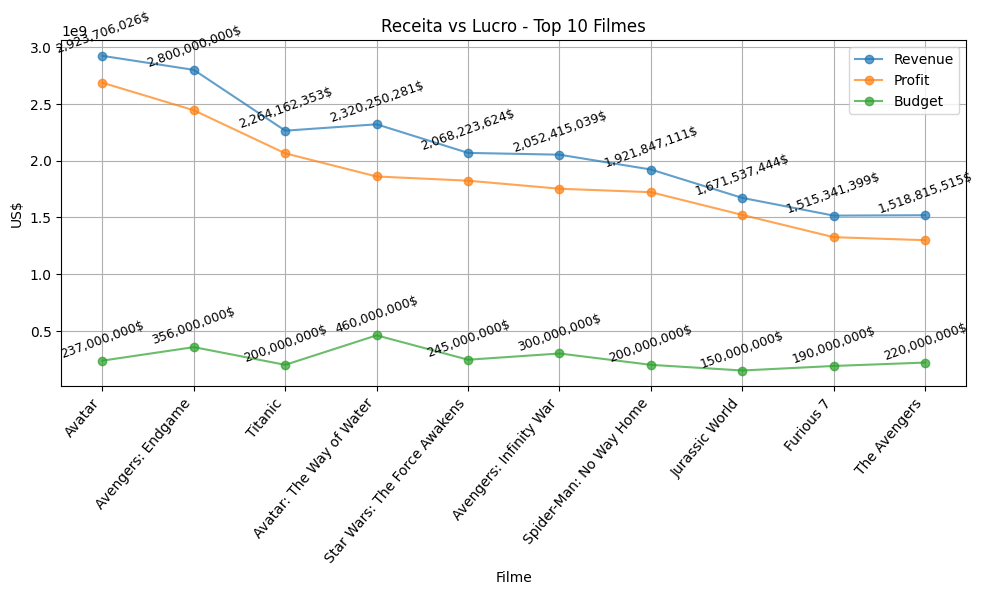

In [12]:
df['revenue'] = df['revenue'].str.replace('.', '', regex=False).str.replace('$', '', regex=False)
df['budget'] = df['budget'].str.replace('.', '', regex=False).str.replace('$', '', regex=False)

df['revenue'] = pd.to_numeric(df['revenue'])
df['budget'] = pd.to_numeric(df['budget'])
df['profit'] = df['revenue'] - df['budget']

df_sorted = df.sort_values(by='profit', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.plot(df_sorted['title'], df_sorted['revenue'], marker='o', label='Revenue', alpha=0.7)
plt.plot(df_sorted['title'], df_sorted['profit'], marker='o', label='Profit', alpha=0.7)
plt.plot(df_sorted['title'], df_sorted['budget'], marker='o', label='Budget', alpha=0.7)

for i, value in enumerate(df_sorted['revenue']):
    plt.text(i, value, f"{value:,.0f}$", ha='center', va='bottom', fontsize=9, rotation=20)
for i, value in enumerate(df_sorted['budget']):
    plt.text(i, value, f"{value:,.0f}$", ha='center', va='bottom', fontsize=9, rotation=20)

plt.xticks(rotation=50, ha='right')
plt.title('Receita vs Lucro - Top 10 Filmes')
plt.xlabel('Filme')
plt.ylabel('US$')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

Colocando os valores da receita, lucro e orçamento num gráfico de séries facilmente conseguimos observar que os top 10 filmes mais rentáveis de sempre, mesmo tendo um orçamento elevado,
o seu lucro é muito mais superior. 
Podemos fazer essa dedução mesmo sem termos a barra de lucro presente; quanto maior for a diferença vertical entre o ponto de um orçamento e o ponto de receita, deduzimos que o lucro será maior.

Analisando o gráfico, conseguimos concluir que o filme com mais rentável de sempre foi o Avatar (2012).

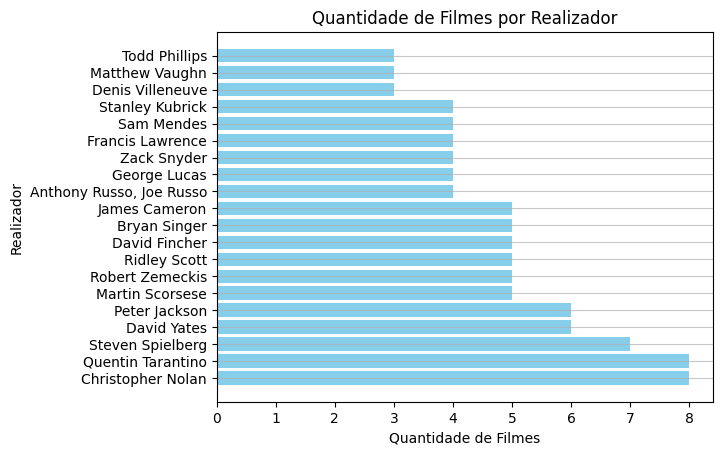

In [13]:
director_count = df['Director'].value_counts().head(20)

plt.barh(director_count.index, director_count.values, color='skyblue')

plt.title('Quantidade de Filmes por Realizador')
plt.xlabel('Quantidade de Filmes')
plt.ylabel('Realizador')
plt.grid(axis='y', alpha=0.7)

plt.show()

Gráficos de barras são ótimos para visualizar informação sobre contagens, podendo realizar análise rápidas sobre os mesmos. No gráfico acima, estamos a fazer um levantamento dos 10 primeiros realizadores que aparecem no Dataset, e por sua vez vemos a quantidade de filmes que cada um já realizou. Podemos concluir que o realizador "Christopher Nolan" é dos mais presentes no Dataset, ou pelo menos da extração feita do Dataset.

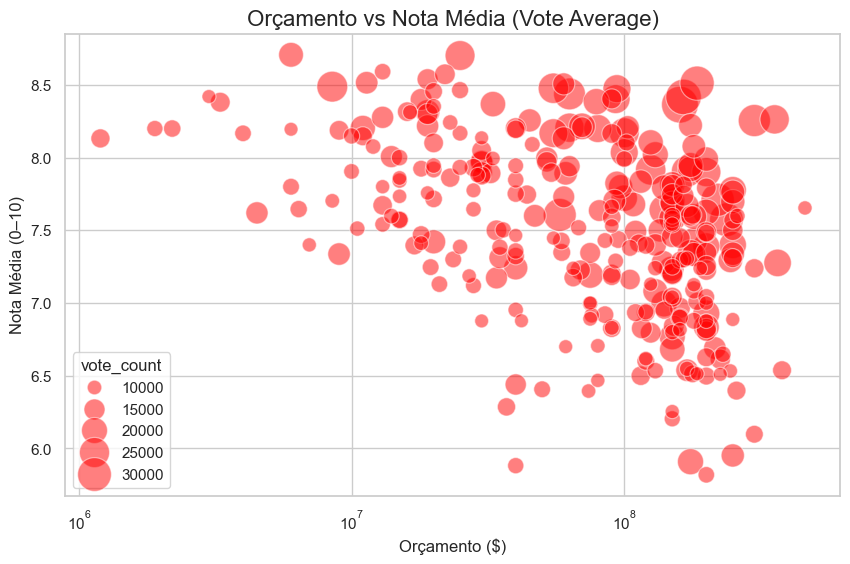

In [14]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="budget",
    y="vote_average",
    size="vote_count",
    sizes=(100, 700),
    alpha=0.5,
    color="red"
)

plt.title("Orçamento vs Nota Média (Vote Average)", fontsize=16)
plt.xscale("log")   # orçamento varia muito
plt.xlabel("Orçamento ($)")
plt.ylabel("Nota Média (0–10)")
plt.show()

## Análise do Scatterplot: Orçamento vs Nota Média (Vote Average)

### O que o gráfico mostra

*   **Eixo X (Orçamento)**: está em escala logarítmica. Se não estivesse nesta escala, irião aparecer imensos números
*   **Eixo Y (Nota Média)**: varia entre aproximadamente 6.0 e 8.5 (escala de 0 a 10).
*   **Tamanho dos pontos**: indica `vote_count` (quanto maior a bola, mais votos o filme recebeu).

***

### Padrões observados
1.  **Distribuição das notas**
    *   A maioria dos filmes está concentrada entre 6.5 e 8.0.
    *   Poucos filmes têm notas abaixo de 6.0 ou acima de 8.5.

2.  **Relação entre orçamento e nota média**
    *   Não há correlação clara entre orçamento e nota média.
    *   Filmes com orçamento alto não garantem notas mais altas.
    *   Filmes com orçamento baixo também podem ter boas avaliações.

3.  **Número de votos (tamanho das bolas)**
    *   Filmes com mais votos (bolas maiores) tendem a estar na faixa de orçamento médio a alto.
    *   Filmes com poucos votos aparecem menores e estão espalhados por todas as faixas de orçamento.

Os **scatterplots** (ou gráficos de dispersão) são úteis para visualizar a relação entre duas ou mais variáveis numéricas, ajudando a identificar padrões, tendências, correlações e valores atípicos (outliers). No gráfico acima conseguimos relacionar 3 tipos de dados: Orçamento, Classificação e Quantidade de Votos. O valores são bastante concentrados, tendo poucos outliers.

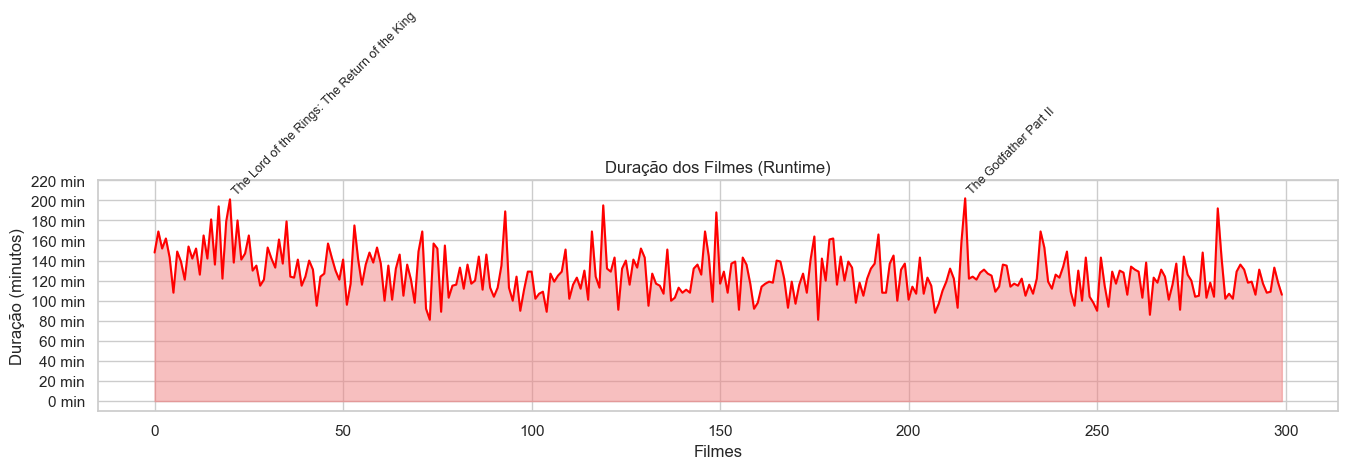

In [15]:
plt.figure(figsize=(16,3))
plt.fill_between(df.index, df['runtime'], color='lightcoral', alpha=0.5)
plt.plot(df['runtime'], color='red')

max_runtime = df['runtime'].max()
plt.yticks(np.arange(0, max_runtime + 20, 20))

def format_minutes(x, pos):
    return f'{int(x)} min'
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_minutes))

for i, runtime in enumerate(df['runtime']):
    if runtime > 200:
        plt.text(i, runtime + 2, df.loc[i, 'title'], rotation=45, ha='left', va='bottom', fontsize=9)

plt.title('Duração dos Filmes (Runtime)')
plt.xlabel('Filmes')
plt.ylabel('Duração (minutos)')
plt.grid(True)
plt.show()


## **Análise do Gráfico de Área: Duração dos Filmes (Runtime)**

### **O que o gráfico mostra**

*   **Eixo X (Filmes)**: representa os filmes.
*   **Eixo Y (Duração em minutos)**: varia de 0 até aproximadamente **220 minutos**.
*   **Área preenchida em vermelho**: indica a distribuição das durações ao longo dos filmes.
*   **Linha vermelha**: mostra a variação da duração de cada filme.

***

### **Padrões observados**

1.  **Faixa predominante de duração**
    *   A maioria dos filmes está concentrada entre **80 e 140 minutos**.
    *   Poucos filmes ultrapassam **180 minutos** (outliers).

2.  **Distribuição geral**
    *   Não há tendência clara de aumento ou redução da duração ao longo do índice dos filmes.
      
3.  **Outliers**
    *   Existem alguns picos acima de **200 minutos**, indicando filmes excepcionalmente longos. Nomeadamente o filme "The Lord of the Rings: The Return of the King" e o filme "The Godfather: Part II" destacam-se por ulrapassar este valor.
    *   Também há alguns pontos abaixo de **100 minutos**, indicando filmes curtos ou possivelmente especiais/documentários.

4.  **Densidade**
    *   A área preenchida mostra que a maior parte do espaço está entre **100 e 140 minutos**, reforçando que essa é a duração típica.

***

Os **Gráficos de área** combinam as propriedades de gráficos de linhas com preenchimento, mostrando tanto tendências como a magnitude absoluta dos valores. São excelentes para visualizar composição ao longo do tempo

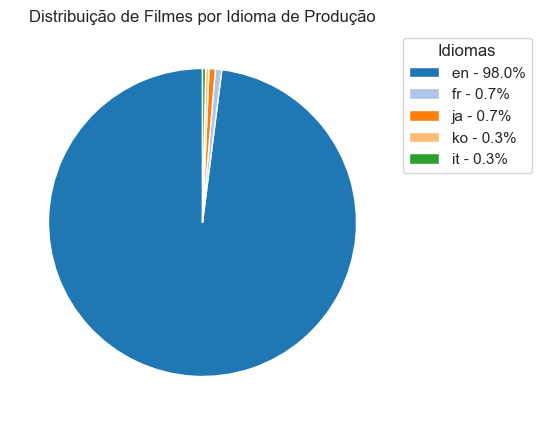

In [16]:
lang_counts = df['original_language'].value_counts()
top_langs = lang_counts.head(5)

percentages = (top_langs / top_langs.sum() * 100).round(1)

fig, ax = plt.subplots(figsize=(8, 5))
wedges, texts = ax.pie(
    top_langs,
    labels=None,
    startangle=90,
    colors=plt.cm.tab20.colors
)

legend_labels = [f"{lang} - {perc}%" for lang, perc in zip(top_langs.index, percentages)]
ax.legend(
    wedges,
    legend_labels,
    title="Idiomas",    bbox_to_anchor=(1, 0, 0.2, 1)
)

plt.title('Distribuição de Filmes por Idioma de Produção')
plt.show()


## **Análise do Gráfico Circular: Distribuição de Filmes por Idioma de Produção**

### **O que o gráfico mostra**

*   **Tipo de gráfico**: Circular (Pie Chart).
*   **Eixo visual**: Cada fatia representa a proporção de filmes por idioma original.
*   **Legenda à direita**: Lista os idiomas com suas respectivas percentagens e cores correspondentes.

Idiomas e percentagens:

*   **en (Inglês)**: 98%
*   **fr (Francês)**: 0,7%
*   **ja (Japonês)**: 0,7%
*   **ko (Coreano)**: 0,3%
*   **it (Italiano)**: 0,3%

***

### **Padrões observados**

1.  **Predominância absoluta do inglês**
    *   O idioma **inglês** domina quase todo o gráfico, representando **98%** dos filmes.
    *   Isso indica que a base de dados é fortemente concentrada em produções de Hollywood e de países cuja lingua nativa é inglês.

2.  **Diversidade mínima**
    *   Os demais idiomas (fr, ja, ko, it e Outros) juntos somam apenas **2,3%**.
    *   Cada um desses idiomas aparece com menos de **1%**, mostrando baixa representatividade.

3.  **Distribuição extremamente desbalanceada**
    *   A fatia azul (inglês) ocupa praticamente todo o círculo.
    *   As outras fatias são tão pequenas que quase não são visíveis no gráfico, reforçando a concentração.
***



Os **Gráficos circulares** representam proporções de um todo, sendo ideais para mostrar como é repartida uma quantidade total entre diferentes categorias.

Mesmo 5 idiomas dominarem o gráfico no que toca ao idioma em que os filmes foram produzidos, grande parte existem inúmeras outras línguas faladas no diálogo destes filmes. Vejamos:

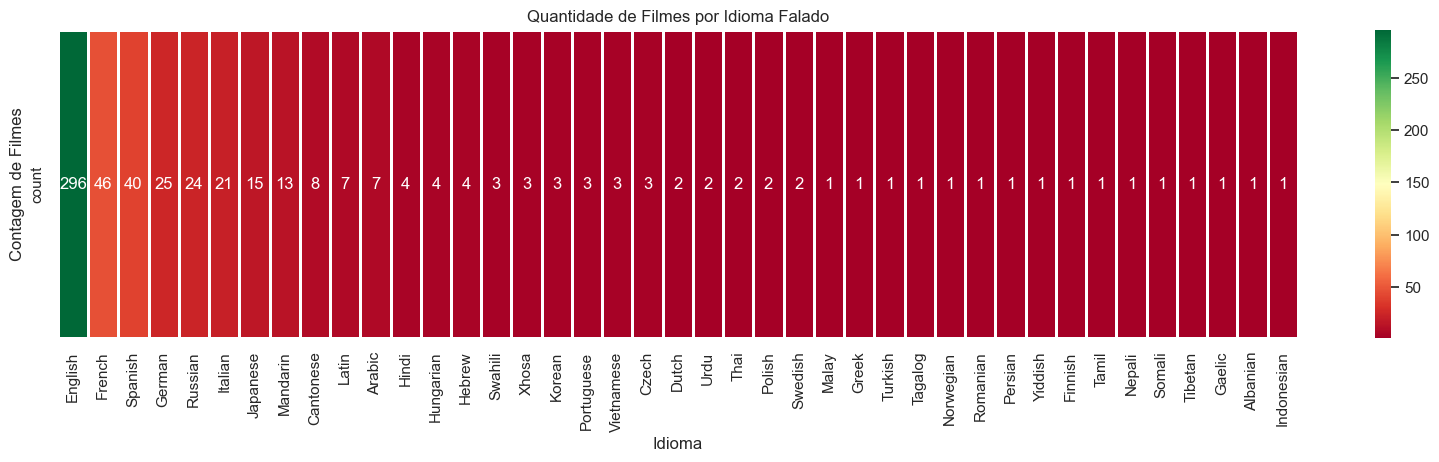

In [17]:
all_languages = []
for langs in df['spoken_languages']:
    if pd.isna(langs):
        continue
    langs_list = [lang.strip() for lang in langs.split(',')]
    all_languages.extend(langs_list)

language_counts = Counter(all_languages)

language_df = pd.DataFrame(language_counts.items(), columns=['language', 'count'])
language_df = language_df.sort_values(by='count', ascending=False)

table = language_df.set_index('language').T

fig, ax = plt.subplots(figsize=(20,4))

sns.heatmap(table,
            annot=True,
            fmt='d',
            linewidths=1,
            cmap='RdYlGn')

plt.title('Quantidade de Filmes por Idioma Falado')
plt.xlabel('Idioma')
plt.ylabel('Contagem de Filmes')
plt.show()


Ainda assim, o idioma mais falado na extração do Dataset é maioritariamente o inglês. No entanto, a diversidade de idiomas é bastante mais diferenciado.

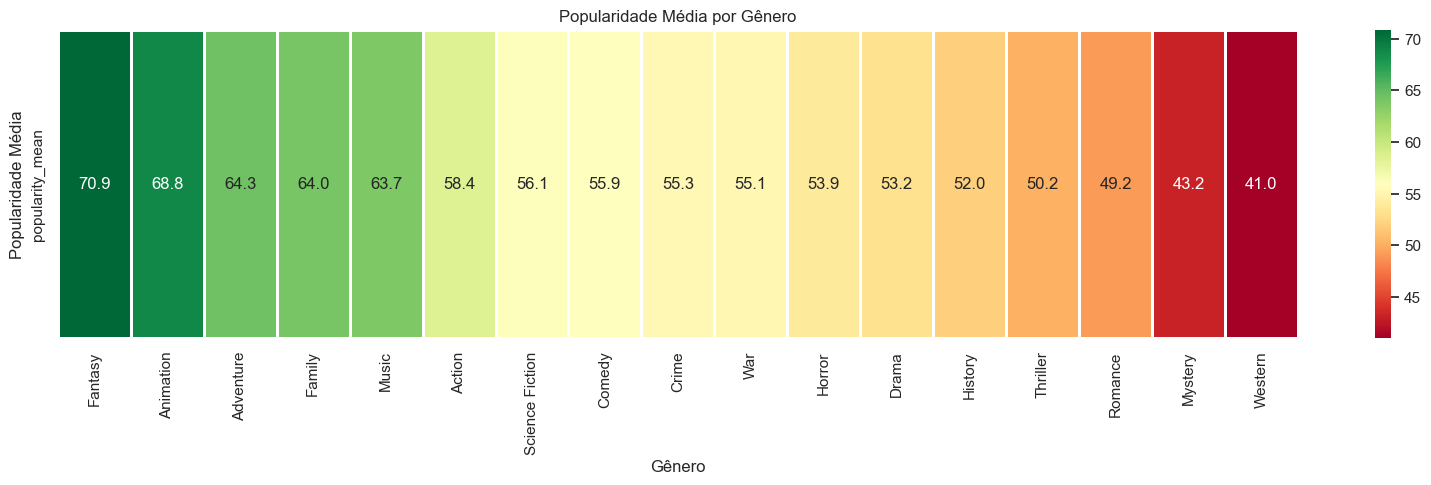

In [22]:
df_gen = df.copy()
df_gen['genres'] = df_gen['genres'].apply(
    lambda x: [g.strip() for g in x.split(',')] if pd.notna(x) else []
)
df_gen = df_gen.explode('genres')

df_gen = df_gen[df_gen['genres'] != ""]

genre_popularity = df_gen.groupby('genres')['popularity'].mean().sort_values(ascending=False)

genre_popularity_df = pd.DataFrame(genre_popularity).reset_index()
genre_popularity_df.columns = ['genre', 'popularity_mean']

table = genre_popularity_df.set_index('genre').T

# Plotar heatmap
plt.figure(figsize=(20,4))
sns.heatmap(
    table,
    annot=True,
    fmt='.1f',
    linewidths=1,
    cmap='RdYlGn'
)

plt.title('Popularidade Média por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Popularidade Média')
plt.show()
